In [1]:
#Import Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_iris=pd.read_csv('Iris.csv')

In [5]:
df_iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df_iris=df_iris.drop('Id',axis=1)

In [10]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [61]:
df_iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
#We dont have null values
#We dont have categorical variables
#We can check for ouliers

In [18]:
df_iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [16]:
independent_Columns=df_iris.drop(['Species'],axis=1)

In [20]:
independent_Columns.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [19]:
df_iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

IndexError: index 4 is out of bounds for axis 0 with size 4

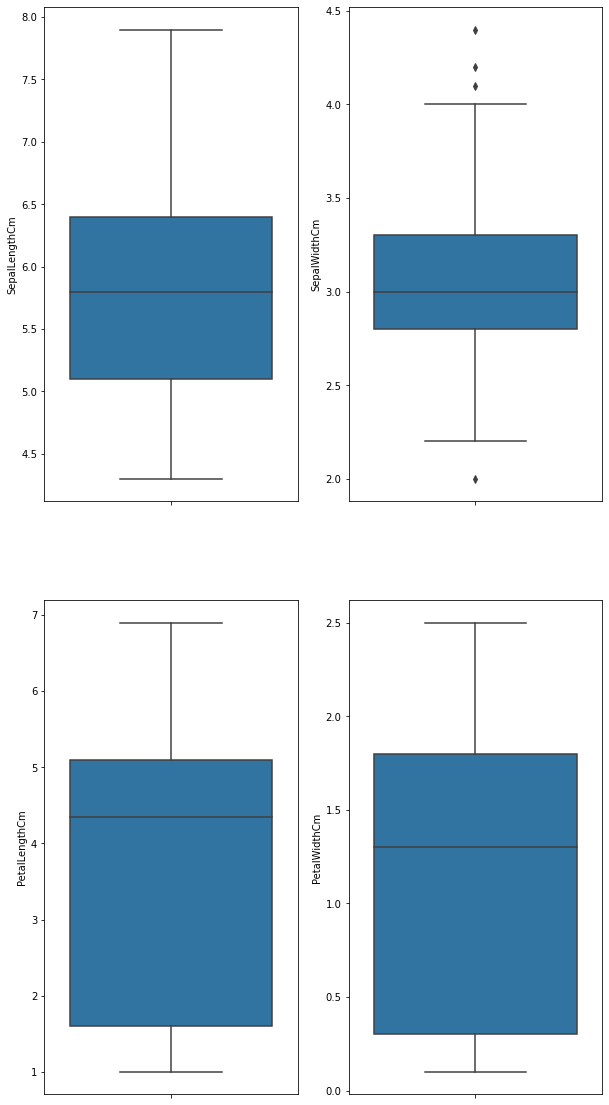

In [29]:
fig, ax=plt.subplots(ncols=2, nrows=2, figsize=(10, 20))
index = 0
ax = ax.flatten()

for col,value in df_iris.items():
    sns.boxplot(y=col, data=df_iris, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

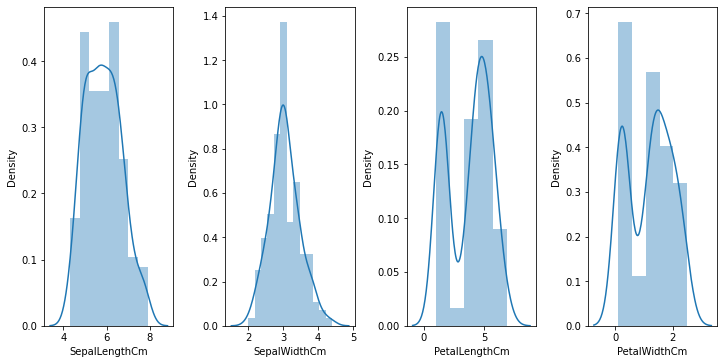

In [41]:
fig, ax=plt.subplots(ncols=4, nrows=1, figsize=(10,5))
index = 0
ax = ax.flatten()

for col,value in df_iris.drop('Species',axis=1).items():
    sns.distplot(value,ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [62]:
#Lets use scatter plot to see how the values can be classified

In [80]:
target_col=df_iris['Species'].unique()
color=['Green','Red','Yellow']

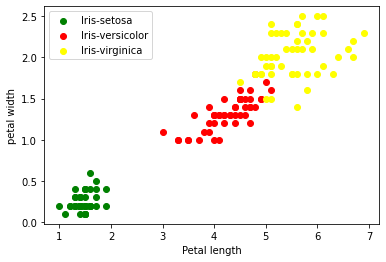

In [83]:
for i in range(len(target_col)):
    x=df_iris[df_iris['Species']==target_col[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],color=color[i],label=target_col[i])
plt.xlabel('Petal length')
plt.ylabel('petal width')
plt.legend()

In [84]:
#Correlation Matrix

<AxesSubplot:>

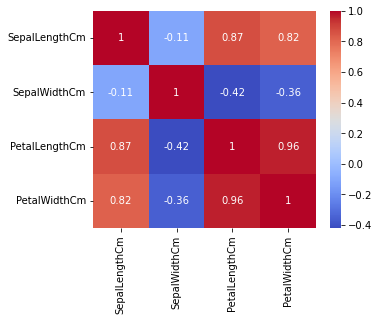

In [87]:
corr=df_iris.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [90]:
df_iris['Species']=le.fit_transform(df_iris['Species'])

In [91]:
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Model Training

In [42]:
X=df_iris.drop(['Species'],axis=1)
Y=df_iris['Species']

In [92]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score 
def train(model,x,y):
    #train the model
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=42)
    model.fit(X_train,Y_train)
    #predict the training set
    pred=model.predict(X_test)
    #perform cross validation
    cv_score=cross_val_score(model,x,y,cv=5)
    cv_score=np.abs(np.mean(cv_score))
    
    print('model report')
    print('mean squared error:',accuracy_score(Y_test,pred))
    print('cv score:',cv_score)

In [93]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
train(model,X,Y)


model report
mean squared error: 1.0
cv score: 0.9733333333333334


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [94]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
train(model,X,Y)


model report
mean squared error: 1.0
cv score: 0.9666666666666668


In [95]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
train(model,X,Y)

model report
mean squared error: 1.0
cv score: 0.9666666666666668
